In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

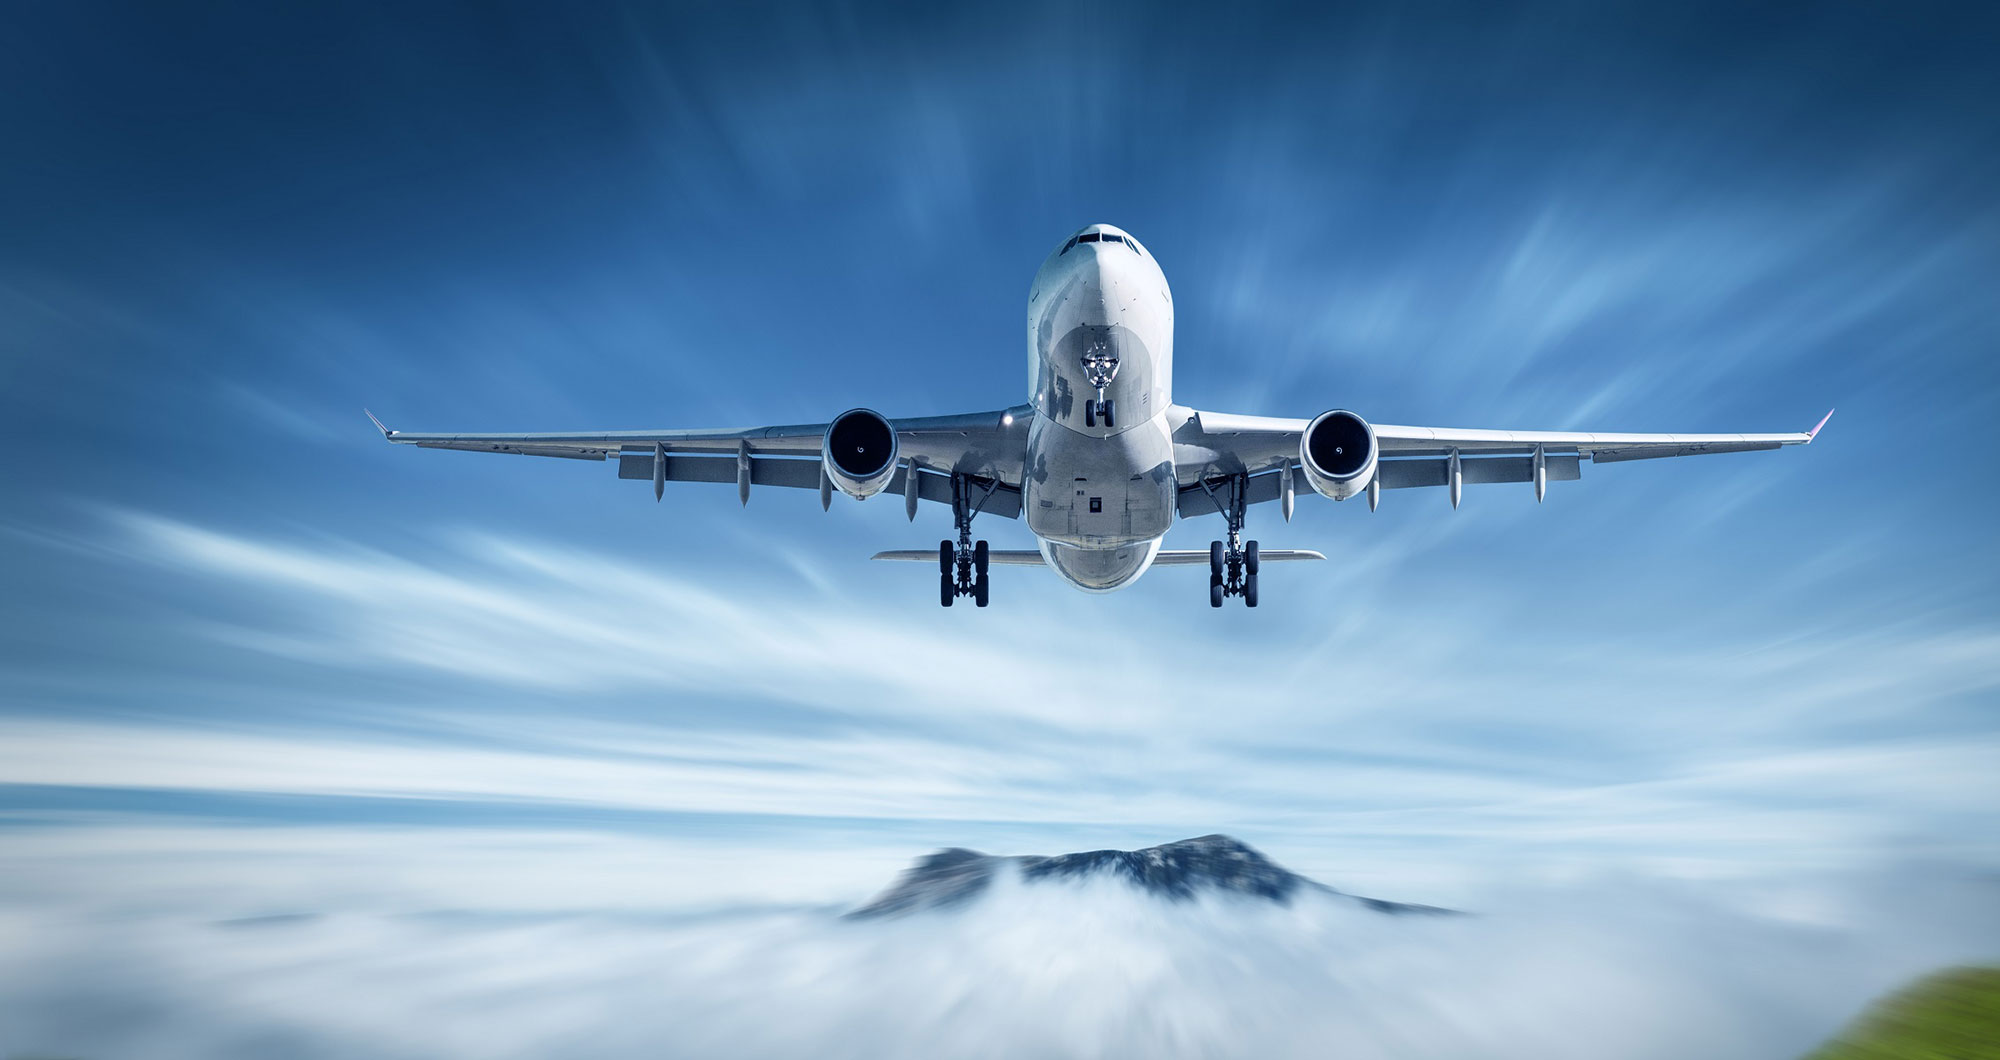

# **Ok, the analisys today will be the sentiment about the airlines tweets all over the America. We know that it's a important rated indicator of the quality service the company is providing to their costumers. And now we gonna find out over a bunch of analisys and predictions how eficient they are according with the tweets of costumers.**

 **First, let's import the main libraries.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')

**Bellow, it's a little function to resize the plots.**

In [ ]:
def resizeplot(x,y,d):
    plt.figure(figsize=(x,y),dpi=d)

In [ ]:
df.head()

**Well, as we can see, there is a bunch of nan data. Let's check.**

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

**Ok, now we gonna create a imputer to fill the nan data from the float columns.**
**Remember: Imputation for completing missing values using k-Nearest Neighbors.
Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.**

In [ ]:
imputer = KNNImputer(missing_values=float ,n_neighbors=5,metric='nan_euclidian',weights='uniform')

In [ ]:
df.columns

**There are other categorical features that has many 'nan' data.**
**I'll perform a feature engineering filling with 'unknown' data for the best visualization of our analisys.**
**Check this out.**

In [ ]:
df['negativereason'].fillna('unknown',inplace=True)

In [ ]:
df['negativereason_confidence'].mean()

In [ ]:
df['negativereason_confidence'].unique()

In [ ]:
df['negativereason_confidence'].fillna(0,inplace=True)

In [ ]:
df['negativereason_confidence'] = imputer.fit_transform(df[['negativereason_confidence']])

In [ ]:
df['airline_sentiment_gold'].unique()

In [ ]:
df['negativereason_gold'].fillna('unknown',inplace=True)

In [ ]:
df['airline_sentiment_gold'].fillna('unknown',inplace=True)

In [ ]:
df['tweet_location'].fillna('unknown',inplace=True)

In [ ]:
df['tweet_coord'].fillna('unknown',inplace=True)

In [ ]:
df['user_timezone'].fillna('unknown',inplace=True)

In [ ]:
df['negativereason_gold'].value_counts()

In [ ]:
df['airline_sentiment_gold'].value_counts()

In [ ]:
df.isnull().sum()

**Good, above none of null data. Let's go on.**

In [ ]:
resizeplot(10,6,90)
plt.xticks(rotation=70);
sns.countplot(x='negativereason',data=df)

**As we can see above, the negative kind of service its a Customer Service Issue in general.**

**Just a curiosity, let's check the correlation between the features.**

In [ ]:
resizeplot(10,6,90)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

**Let's drop the 'tweet_id.**

In [ ]:
df.drop('tweet_id',axis=1,inplace=True)

**Let's check statistics of the airline_sentiment.**

In [ ]:
df.groupby('airline_sentiment').describe().transpose()

**Well, most of them it's about a negative sentiment. That's worrisome. Let's go on.**

**Down bellow I did a counting of the airline sentiment based on each airline, let's see how it works.**

In [ ]:
pd.DataFrame(df[['airline_sentiment','airline']].value_counts(),columns=['rated'])

**Well, United, Airways and American, the top of 3 worst.But we have Southwest as one of the best.
Let's visualize this the other way.**

In [ ]:
resizeplot(10,6,90)
sns.countplot(x='airline',hue='airline_sentiment',data=df)

**Where this tweets came from?**

In [ ]:
pd.DataFrame(df[['airline_sentiment','tweet_location','airline']].value_counts(),columns=['Rated']).head(30)

In [ ]:
df['tweet_location'].unique()

**I personally don't like the word clouds but let's check anyway. Maybe give us a bad luck if I don't.**

In [ ]:
color_map = ListedColormap(['orange','green','red','magenta'])
cloud = WordCloud(background_color='black',max_words = 100,colormap=color_map)
review = df['negativereason']
cloud = cloud.generate(str(review))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

**Now the predictions based on the airline sentiment and the text. I used the 4 basics(could used more of course) algorithms of machine learning to do this. For the better results I could use GridSeachCV to take the maximum possibility of the results but will take too long, but the code is commented if you want to test, please be my guest.**

In [ ]:
data = df[['airline_sentiment','text']]

In [ ]:
data

In [ ]:
X = data['text']
y = data['airline_sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [ ]:
tfid = TfidfVectorizer(stop_words='english')

tfid.fit(X_train)

X_train_tfid = tfid.transform(X_train)
X_test_tfid = tfid.transform(X_test)

In [ ]:
X_train_tfid

In [ ]:
#MULTINOMIAL NB

nb = MultinomialNB()

nb.fit(X_train_tfid,y_train)

In [ ]:
#LOGISTIC REGRESSION

#lr = LogisticRegression(solver='saga',multi_class='ovr',max_iter = 1000)
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_tfid,y_train)

#penalty = ['l1','l2']
#l1_ratio = np.linspace(0,10)
#C = np.logspace(0,10)

#param_grid_lr = {'penalty':penalty,'l1_ratio':l1_ratio,'C':C}

#grid_model = GridSearchCV(lr,param_grid=param_grid_lr,cv=2,verbose=2,n_jobs=-1)

In [ ]:
#grid_model.fit(X_train_tfid,y_train)
lr.fit(X_train_tfid,y_train)

In [ ]:
#SVC

svc = SVC()

svc.fit(X_train_tfid,y_train)

#penalty_svc = ['l1','l2']
#C_svc = np.logspace(0,10)
#param_grid_svc = {'penalty':penalty_svc,'loss':['hinge', 'squared_hinge'],
                  #'C'=C_svc,'multi_class':['ovr'],
                  #'max_iter':[1000] }

#grid_model_svc = GridSearchCV(rbf_svc,param_grid=param_grid_svc,cv=2,verbose=2,n_jobs=-1)

In [ ]:
#DECISION TREE

dt = DecisionTreeClassifier()
dt.fit(X_train_tfid,y_train)

In [ ]:
#METRICS FUNCTION

def report(model):
    preds =model.predict(X_test_tfid)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfid,y_test)

**Testing the metrics.**

In [ ]:
#MULTINOMIALNB

report(nb)

In [ ]:
#LOGISTIC_REGRESSION_MODEL

report(lr)

In [ ]:
#SVC MODEL

report(svc)

In [ ]:
# DECISION TREE MODEL

report(dt)

**As we can see, the Logistic Regression was our winner. Let's check the pipeline brings us the prediction of whole data.**

In [ ]:
pipe = Pipeline([('tfid',TfidfVectorizer()),('LR',LogisticRegression())])

In [ ]:
pipe.fit(X,y)

**Let's see if works.**

In [ ]:
pipe.predict(['ok flight'])

**Good, the 'ok flight' it's on the 'neutral' sentiment.**

# Ok guys, that's it for now, if you liked please smash a upvote and if you don't, make a comment. Be safe!